# 분류, 당뇨병 예측

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터 로드

df = pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# 데이터 전처리 작업




In [11]:
# 데이터 분리 (학습/검증/테스트)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((768, 8), (768,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_train.shape, X_val.shape

((491, 8), (123, 8))

In [15]:
## 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) #출력층 (다중 분류라면 Dense에는 class의 수, activation에 softmax 들어가면 됨)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일
# 손실함수, 옵티마이저
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'acc')

In [18]:
EPOCHS = 500
BATCH_SIZE = 32

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/500
16/16 [==============================] - 2s 28ms/step - loss: 22.5493 - acc: 0.3585 - val_loss: 19.9918 - val_acc: 0.3252
Epoch 2/500
16/16 [==============================] - 0s 6ms/step - loss: 16.3733 - acc: 0.4134 - val_loss: 14.3216 - val_acc: 0.3821
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 12.1122 - acc: 0.4460 - val_loss: 10.1919 - val_acc: 0.4472
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 8.5754 - acc: 0.4705 - val_loss: 6.6202 - val_acc: 0.4634
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 5.3961 - acc: 0.5234 - val_loss: 3.9417 - val_acc: 0.5122
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 3.3875 - acc: 0.5886 - val_loss: 2.3936 - val_acc: 0.6016
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 2.2591 - acc: 0.6232 - val_loss: 1.9114 - val_acc: 0.6667
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 1.7

In [27]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

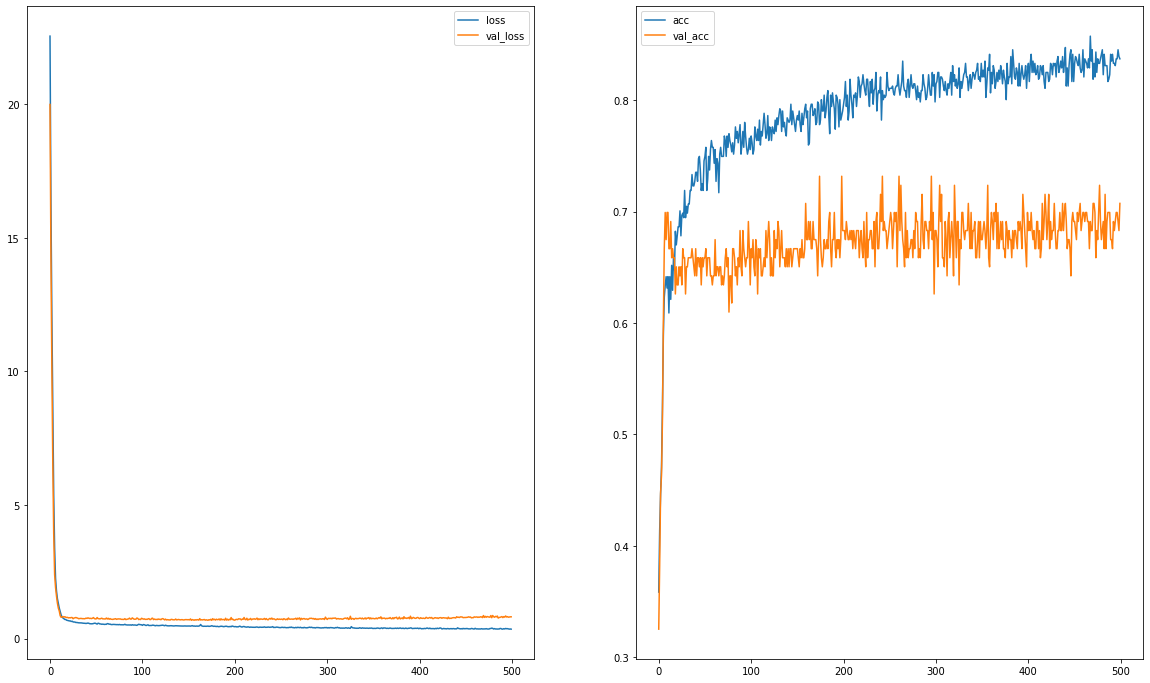

In [28]:
plot_history(history)

In [29]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.6958 - acc: 0.6883


[0.6957648992538452, 0.6883116960525513]

In [30]:
# 예측

y_pred = model.predict(X_test)
# activation이 sigmoid이면 y_pred 값이 0~1 사이의 값이 나옴

In [33]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6883116883116883

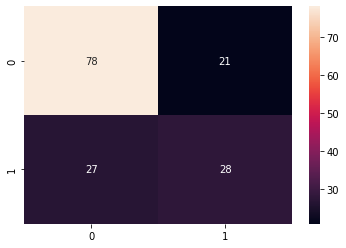

In [45]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True)
plt.show()